In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SYNCHRONY_BROADBAND_DIRECTORY = "../../Data/synchrony/all/broadband"

In [ ]:
# Iterate through all files in the directory
for filename in os.listdir(SYNCHRONY_BROADBAND_DIRECTORY):
    # Load the file
    data = np.load(os.path.join(SYNCHRONY_BROADBAND_DIRECTORY, filename))

    # print if data is all nan
    if np.isnan(data).all():
        print(f"{filename} is all nan")
    else:
        print(f"{filename} is not all nan")

In [6]:
# Load HUP 139 data
hup139_data = np.load(os.path.join(SYNCHRONY_BROADBAND_DIRECTORY, "HUP_139.npy"))

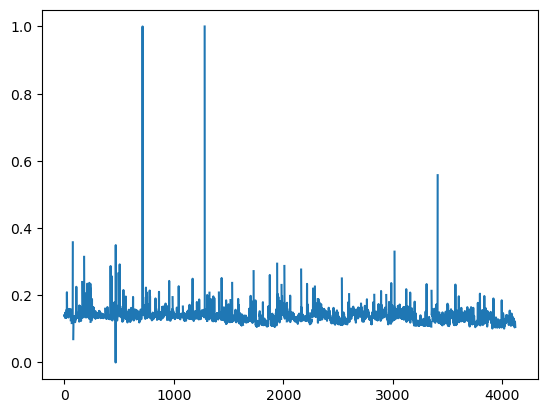

In [8]:
plt.plot(hup139_data)

In [9]:
def find_nan_segments(arr, min_length=240):
    nan_segments = []
    start_index = None
    nan_count = 0

    for i, value in enumerate(arr):
        if np.isnan(value):
            nan_count += 1
            if start_index is None:
                start_index = i
        else:
            if nan_count >= min_length:
                nan_segments.append((start_index, i - 1))
            start_index = None
            nan_count = 0

    # Check for the case where the array ends with a NaN segment
    if nan_count >= min_length:
        nan_segments.append((start_index, len(arr) - 1))

    return nan_segments

In [11]:
find_nan_segments(hup139_data)

[(4119, 8489)]